# Q1

## 1 Part 1

# Bayesian Linear Regression Posterior Derivation

In this setup, we have a linear regression (LR) model in which $y$ is an $n \times 1$ vector of observations, $X$ is an $n \times p$ design matrix, and $\beta$ is a $p \times 1$ vector of regression coefficients.

We assume that the errors are i.i.d. normal with variance $\sigma^2$, so $\Sigma = \sigma^2 I$ (where $I$ is the identity matrix). Consequently, the likelihood is given by:

$$
p(y \mid X, \beta, \Sigma) \propto \exp\Bigl(-\frac{1}{2} (y - X\beta)^T \Sigma^{-1} (y - X\beta)\Bigr).$$

## Prior on $\beta$

We place a multivariate normal (MVN) prior on $\beta$:

$$p(\beta) = \mathrm{MVN}(\beta_0, \Sigma_\beta).$$

In exponential form, this can be written as:

$$p(\beta) \propto \exp\Bigl(-\frac{1}{2}(\beta - \beta_0)^T \Sigma_\beta^{-1} (\beta - \beta_0)\Bigr).$$

## Posterior via Bayes' Rule

By Bayes' rule, the posterior distribution of $\beta$ given $y, X, \Sigma$ is:

$$p(\beta \mid y, X, \Sigma) \propto p(y \mid X, \beta, \Sigma) \times p(\beta).$$

Substituting the exponential forms of the likelihood and prior:

$$p(\beta \mid y, X, \Sigma) \propto \exp\Bigl(-\frac{1}{2}(y - X\beta)^T \Sigma^{-1} (y - X\beta)\Bigr) \times \exp\Bigl(-\frac{1}{2}(\beta - \beta_0)^T \Sigma_\beta^{-1} (\beta - \beta_0)\Bigr).$$

## Combining the Quadratic Forms

Next, we combine and collect terms in $\beta$. Grouping them into a standard quadratic form yields:

$$-\frac{1}{2} \Bigl[ \beta^T \bigl(X^T \Sigma^{-1} X + \Sigma_\beta^{-1}\bigr) \beta \; - \; 2 \beta^T\bigl(X^T \Sigma^{-1} y + \Sigma_\beta^{-1}\beta_0\bigr) \Bigr] + \text{constants}.$$

Recognizing this as a multivariate normal distribution in $\beta$, we identify the posterior covariance $\Sigma_{\beta \mid y}$ and mean $\mu_{\beta \mid y}$:

$$\Sigma_{\beta \mid y} = \Bigl(X^T \Sigma^{-1} X + \Sigma_\beta^{-1}\Bigr)^{-1},$$

$$\mu_{\beta \mid y} = \Sigma_{\beta \mid y} \Bigl(X^T \Sigma^{-1} y + \Sigma_\beta^{-1} \beta_0\Bigr).$$

Hence, the posterior distribution for $\beta$ is:

$$\beta \mid y, X, \Sigma \sim \mathrm{MVN}\bigl(\mu_{\beta \mid y}, \Sigma_{\beta \mid y}\bigr),$$

where

$$\mu_{\beta \mid y} = \Sigma_{\beta \mid y}\bigl(X^T \Sigma^{-1} y + \Sigma_\beta^{-1}\beta_0\bigr), \quad \Sigma_{\beta \mid y} = \Bigl(X^T \Sigma^{-1} X + \Sigma_\beta^{-1}\Bigr)^{-1}.$$


## Part 2

# Posterior Derivation for $\sigma^2$ in Bayesian Linear Regression

In this scenario, we have a Bayesian linear regression model where the response vector $y$ (of length $n$) is assumed to follow a normal distribution with mean $X\beta$ and covariance $\sigma^2 I$. Hence, the likelihood of $y$ given $X$, $\beta$, and $\sigma^2$ is:

$$
p(y \mid X, \beta, \sigma^2) \propto (\sigma^2)^{-\frac{n}{2}} \exp\Bigl(-\tfrac{1}{2\sigma^2}(y - X\beta)^T(y - X\beta)\Bigr).$$

We then place an inverse-gamma (Inv-Gamma) prior on the error variance $\sigma^2$ with hyperparameters $\alpha^*$ and $\beta^*$:

$$
p(\sigma^2) = \mathrm{Inv\text{-}Gamma}(\alpha^*, \beta^*),$$

which, in its proportional form, can be written as:

$$
p(\sigma^2) \propto (\sigma^2)^{-(\alpha^* + 1)} \exp\Bigl(-\tfrac{\beta^*}{\sigma^2}\Bigr).$$

By applying Bayes’ rule, the posterior distribution of $\sigma^2$ given $y, X, \beta$ is:

$$
p(\sigma^2 \mid y, X, \beta) \propto p(y \mid X, \beta, \sigma^2)\, p(\sigma^2).$$

Substituting the expressions for the likelihood and prior:

$$
p(\sigma^2 \mid y, X, \beta) \propto (\sigma^2)^{-\frac{n}{2}} \exp\Bigl(-\tfrac{1}{2\sigma^2}(y - X\beta)^T(y - X\beta)\Bigr) \;\times\; (\sigma^2)^{-(\alpha^* + 1)} \exp\Bigl(-\tfrac{\beta^*}{\sigma^2}\Bigr).$$

Combining like terms in $\sigma^2$:

$$
p(\sigma^2 \mid y, X, \beta) \propto (\sigma^2)^{-\bigl(\alpha^* + \frac{n}{2} + 1\bigr)} \exp\Bigl(-\tfrac{1}{\sigma^2}\bigl(\beta^* + \tfrac{1}{2}(y - X\beta)^T(y - X\beta)\bigr)\Bigr).$$

Recognizing this as an inverse-gamma distribution with updated shape and scale parameters, we conclude:

$$\sigma^2 \mid y, X, \beta \sim \mathrm{Inv\text{-}Gamma}\Bigl(\alpha^* + \tfrac{n}{2}, \; \beta^* + \tfrac{1}{2}(y - X\beta)^T(y - X\beta)\Bigr).$$

This result shows that if $\sigma^2$ follows an inverse-gamma prior and the likelihood is Gaussian with mean $X\beta$, the posterior remains inverse-gamma with parameters shifted by $n/2$ in the shape and by $\tfrac{1}{2}(y - X\beta)^T(y - X\beta)$ in the scale.


# Q2

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta0, betas, sigma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 181 seconds.


               mean     sd     hdi_3%    hdi_97%  mcse_mean  mcse_sd  \
beta0      1216.263  9.979   1197.795   1235.396      0.094    0.066   
betas[0]      2.563  1.001      0.654      4.408      0.010    0.007   
betas[1]      4.351  0.986      2.574      6.260      0.010    0.007   
betas[2]      5.821  0.998      4.031      7.791      0.009    0.006   
betas[3]      5.540  0.972      3.664      7.300      0.009    0.006   
betas[4]      0.299  1.006     -1.494      2.291      0.010    0.010   
sigma     30943.533  4.977  30934.406  30953.316      0.047    0.033   

          ess_bulk  ess_tail  r_hat  
beta0      11431.0    6354.0    1.0  
betas[0]   10423.0    6540.0    1.0  
betas[1]    9551.0    6630.0    1.0  
betas[2]   13051.0    6665.0    1.0  
betas[3]   11200.0    6094.0    1.0  
betas[4]   10207.0    6580.0    1.0  
sigma      11201.0    6257.0    1.0  


array([[<Axes: title={'center': 'beta0'}>,
        <Axes: title={'center': 'beta0'}>],
       [<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

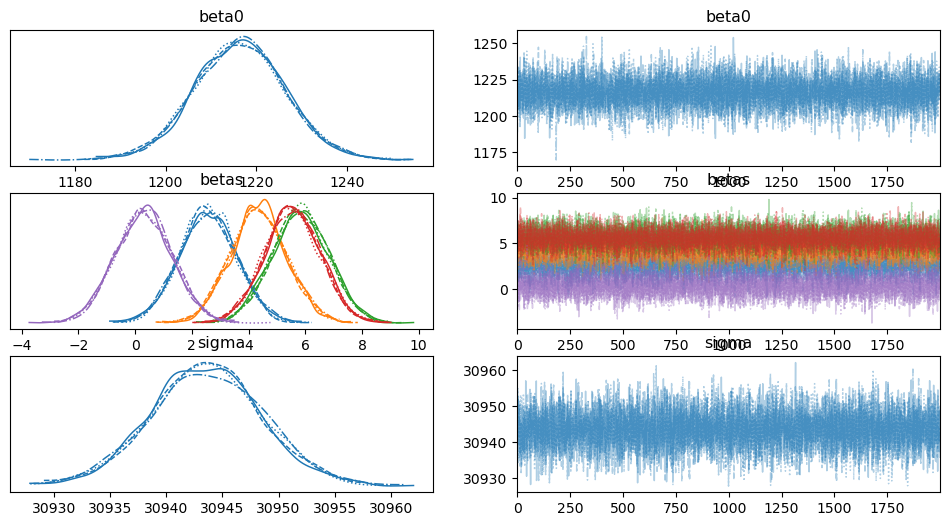

In [5]:
# Q2 - Perform Bayesian Linear Regression on a different dataset
# We'll use the House Sales in King County, USA dataset:
# https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

import pandas as pd
from sklearn.preprocessing import StandardScaler
import pymc as pm
import arviz as az
import numpy as np

# 1. Load the dataset (make sure you've downloaded 'kc_house_data.csv' from the Kaggle link)
df = pd.read_csv('Homework 7/kc_house_data.csv')

# 2. Select a subset of relevant features
#    Here, we focus on a few numeric predictors for house price
selected_features = [
    'bedrooms',
    'bathrooms',
    'sqft_living',
    'grade',
    'condition'
]

df = df[['price'] + selected_features].dropna()

# 3. Define X (predictors) and y (response)
X = df.drop('price', axis=1)
y = df['price'].values

# 4. Standardize the predictor variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Build the PyMC model
with pm.Model() as model:
    # Priors
    beta0 = pm.Normal('beta0', mu=0, sigma=10)
    betas = pm.Normal('betas', mu=0, sigma=1, shape=X_scaled.shape[1])
    sigma = pm.HalfNormal('sigma', sigma=10)

    # Linear predictor
    mu = beta0 + pm.math.dot(X_scaled, betas)

    # Likelihood
    y_obs = pm.Normal('y_obs', mu=mu, sigma=sigma, observed=y)

    # MCMC Sampling
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

# 6. Posterior summary and diagnostics
summary = az.summary(trace)
print(summary)

# Visualize the trace plots
az.plot_trace(trace)


# Q3

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta0, betas, nu, sigma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 296 seconds.


             mean     sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta0       5.808  9.975  -12.996   23.955      0.102    0.095    9530.0   
betas[0]   -0.005  0.990   -1.945    1.745      0.010    0.011   10620.0   
betas[1]   -0.011  0.988   -1.808    1.845      0.009    0.011   10986.0   
betas[2]   -0.019  0.985   -1.831    1.859      0.009    0.011   10817.0   
betas[3]   -0.015  1.010   -1.890    1.854      0.010    0.012   10440.0   
betas[4]   -0.006  0.995   -1.819    1.907      0.010    0.011    9720.0   
nu          0.125  0.001    0.123    0.127      0.000    0.000    9392.0   
sigma     520.010  7.363  506.466  533.946      0.077    0.055    9125.0   

          ess_tail  r_hat  
beta0       5883.0    1.0  
betas[0]    6204.0    1.0  
betas[1]    6472.0    1.0  
betas[2]    6222.0    1.0  
betas[3]    6676.0    1.0  
betas[4]    6141.0    1.0  
nu          6792.0    1.0  
sigma       6397.0    1.0  


array([[<Axes: title={'center': 'beta0'}>,
        <Axes: title={'center': 'beta0'}>],
       [<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>],
       [<Axes: title={'center': 'nu'}>, <Axes: title={'center': 'nu'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

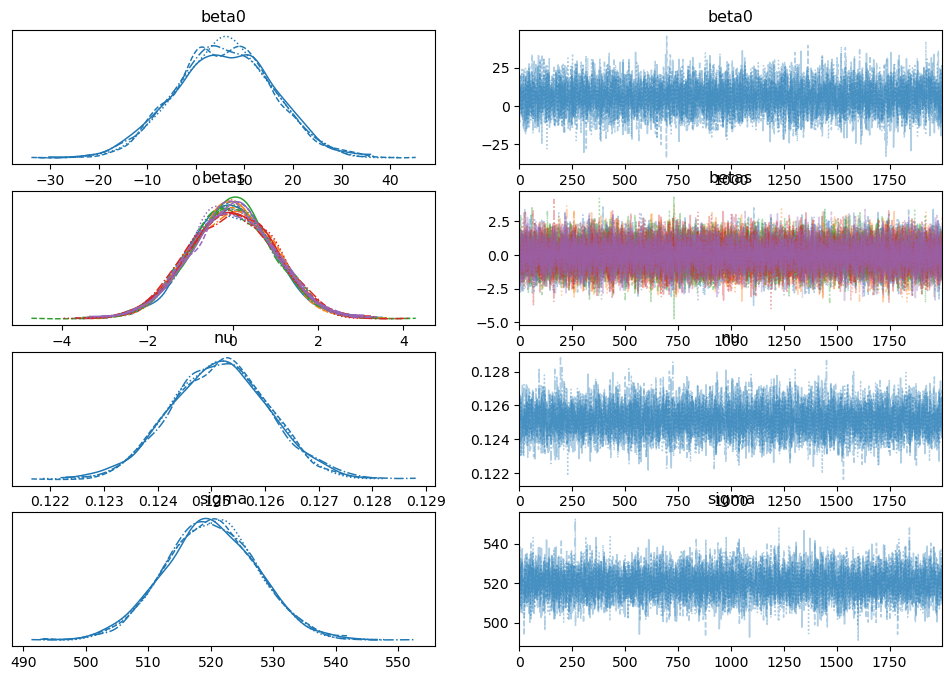

In [11]:
# Q3 - Perform Robust Bayesian Linear Regression on the House Sales in King County dataset
# using Student's t-distribution to handle outliers

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import pymc as pm
import arviz as az

# 1. Load the dataset (the same one from Q2)
df = pd.read_csv('Homework 7/kc_house_data.csv')

# 2. Introduce outliers by inflating price for a random 5% of the data
np.random.seed(42)
outlier_indices = np.random.choice(df.index, size=int(0.05 * len(df)), replace=False)
df.loc[outlier_indices, 'price'] *= 3

# 3. Select features and drop missing
selected_features = [
    'bedrooms',
    'bathrooms',
    'sqft_living',
    'grade',
    'condition'
]

df = df[['price'] + selected_features].dropna()

# 4. One-hot encode categorical variables (if necessary)
# Here, 'grade' and 'condition' are numeric in this dataset, so we skip get_dummies.

# 5. Standardize features
X = df.drop('price', axis=1).values
y = df['price'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Build robust Bayesian model using Student's t-likelihood
p = X_scaled.shape[1]

with pm.Model() as robust_model:
    # Priors
    beta0 = pm.Normal('beta0', mu=0, sigma=10)
    betas = pm.Normal('betas', mu=0, sigma=1, shape=p)
    nu = pm.Exponential('nu', 1/30)  # Prior for degrees of freedom
    sigma = pm.HalfNormal('sigma', sigma=10)

    # Linear predictor
    mu = beta0 + pm.math.dot(X_scaled, betas)

    # Likelihood with Student's t-distribution
    y_obs = pm.StudentT('y_obs', mu=mu, sigma=sigma, nu=nu, observed=y)

    # Sampling
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

# 7. Summarize posterior results
summary = az.summary(trace)
print(summary)

# 8. Trace plots
az.plot_trace(trace)
